# **0. 라이브러리 import**

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action = 'ignore')

# **1. 데이터 불러오기**

## **📌 Data Description**
- index: 구분자
- quality: 품질(target 변수) - 범주형
- fixed acidity: 산도
- volatile acidity: 휘발성산
- citric acid: 시트르산
- residual sugar: 잔당(발효 후 와인 속에 남아있는 당분)
- chlorides: 염화물
- free sulfur dioxide: 독립 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소이온농도
- sulphates: 황산염
- alcohol: 도수
- type: 종류(white vs red)

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [7]:
### train 데이터
# index를 제외하면 총 13개 변수를 가짐
# quality(와인의 품질) - target 변수

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [8]:
### test 데이터
# index를 제외하면 총 12개 변수를 가짐

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


- 와인의 종류에 따라 성질과 품질이 달라질 것이라고 판단함
    - red 와인과 white 와인을 **분리**한 후, 각각에 대한 품질 분류 모델 생성

In [9]:
red_train = train.loc[train['type'] == 'red',:]
red_test = test.loc[test['type'] == 'red',:]

In [10]:
# 이후 submission.csv 파일을 만들기 위해 red wine의 원래 위치 index를 저장

red_idx = list(red_test['index'])

In [11]:
red_train = red_train.reset_index(drop = True)
red_test = red_test.reset_index(drop = True)

# **2. 데이터 전처리 & EDA**

In [12]:
### 필요없는 변수 제거
# index는 불필요한 변수이므로 삭제

red_train = red_train.drop(['index','type'], axis = 1)
red_test = red_test.drop(['index','type'], axis = 1)

## **2-2. 데이터 구조 확인**

In [13]:
### train 데이터의 column 정보 확인

red_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1338 non-null   int64  
 1   fixed acidity         1338 non-null   float64
 2   volatile acidity      1338 non-null   float64
 3   citric acid           1338 non-null   float64
 4   residual sugar        1338 non-null   float64
 5   chlorides             1338 non-null   float64
 6   free sulfur dioxide   1338 non-null   float64
 7   total sulfur dioxide  1338 non-null   float64
 8   density               1338 non-null   float64
 9   pH                    1338 non-null   float64
 10  sulphates             1338 non-null   float64
 11  alcohol               1338 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 125.6 KB


In [14]:
### test 데이터의 column 정보 확인

red_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         261 non-null    float64
 1   volatile acidity      261 non-null    float64
 2   citric acid           261 non-null    float64
 3   residual sugar        261 non-null    float64
 4   chlorides             261 non-null    float64
 5   free sulfur dioxide   261 non-null    float64
 6   total sulfur dioxide  261 non-null    float64
 7   density               261 non-null    float64
 8   pH                    261 non-null    float64
 9   sulphates             261 non-null    float64
 10  alcohol               261 non-null    float64
dtypes: float64(11)
memory usage: 22.6 KB


- type을 제외하고는 모두 숫자형 변수이다.
- 결측치는 존재하지 않는다.

In [15]:
red_train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,5.637519,8.307922,0.525878,0.270142,2.535015,0.087504,15.826607,46.128550,0.996736,3.312930,0.658543,10.433308
std,0.802575,1.729029,0.177923,0.193273,1.402580,0.046605,10.351499,31.803005,0.001887,0.152856,0.173753,1.065428
min,3.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000
25%,5.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996740,3.310000,0.620000,10.200000
75%,6.000000,9.200000,0.635000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.720000,11.100000
max,8.000000,15.900000,1.580000,1.000000,15.400000,0.610000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000


- 데이터들 간의 스케일 차이가 존재함을 확인할 수 있다.
    - 표준화(StandardScaler) 진행
- 데이터 중 일부 이상치가 존재함을 짐작할 수 있다.

## **2-3. 데이터 분포 확인**

### **a) Target 값의 분포**

In [16]:
red_train['quality'].value_counts()

5    571
6    535
7    169
4     41
8     13
3      9
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

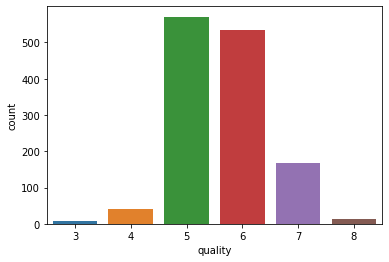

In [17]:
sns.countplot(x = red_train['quality'])

- quality의 클래스가 너무 많다.
    - 5,6이 대부분
    - 3과 8은 매우 적은 수
- 품질을 모아서 4개의 클래스로 재분류
    - 3 + 4 => 4 (worst)
    - 5 (bad)
    - 6 (good)
    - 7 + 8 => 7 (best)

In [18]:
### 클래스 재분류

red_train.loc[red_train['quality'] <= 4, 'new_quality'] = 4
red_train.loc[red_train['quality'] == 5, 'new_quality'] = 5
red_train.loc[red_train['quality'] == 6, 'new_quality'] = 6
red_train.loc[red_train['quality'] >= 7, 'new_quality'] = 7

In [19]:
# 클래스이기에 int 형으로 변환해주기

red_train = red_train.astype({'new_quality':'int32'})

In [20]:
red_train['new_quality'].value_counts()

5    571
6    535
7    182
4     50
Name: new_quality, dtype: int64

<AxesSubplot:xlabel='new_quality', ylabel='count'>

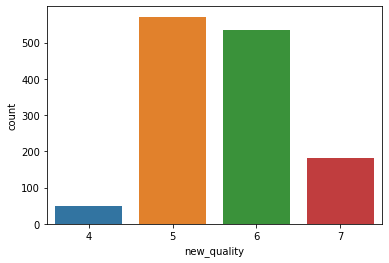

In [21]:
sns.countplot(x = red_train['new_quality'])

In [22]:
### 기존 quality 제거

red_train = red_train.drop('quality', axis = 1)

In [23]:
red_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5
1,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
2,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,5
3,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,5
4,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5


In [24]:
### Label Encoding
# class가 4,5,6,7인 경우 XGBoost에서 오류 발생(0부터 class가 시작하기를 기대함)

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

red_train['new_quality'] = encoder.fit_transform(red_train['new_quality'])

In [25]:
red_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
1,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,2
2,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,1
3,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,1
4,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,1


### **b) 각 feature 변수들의 분포**

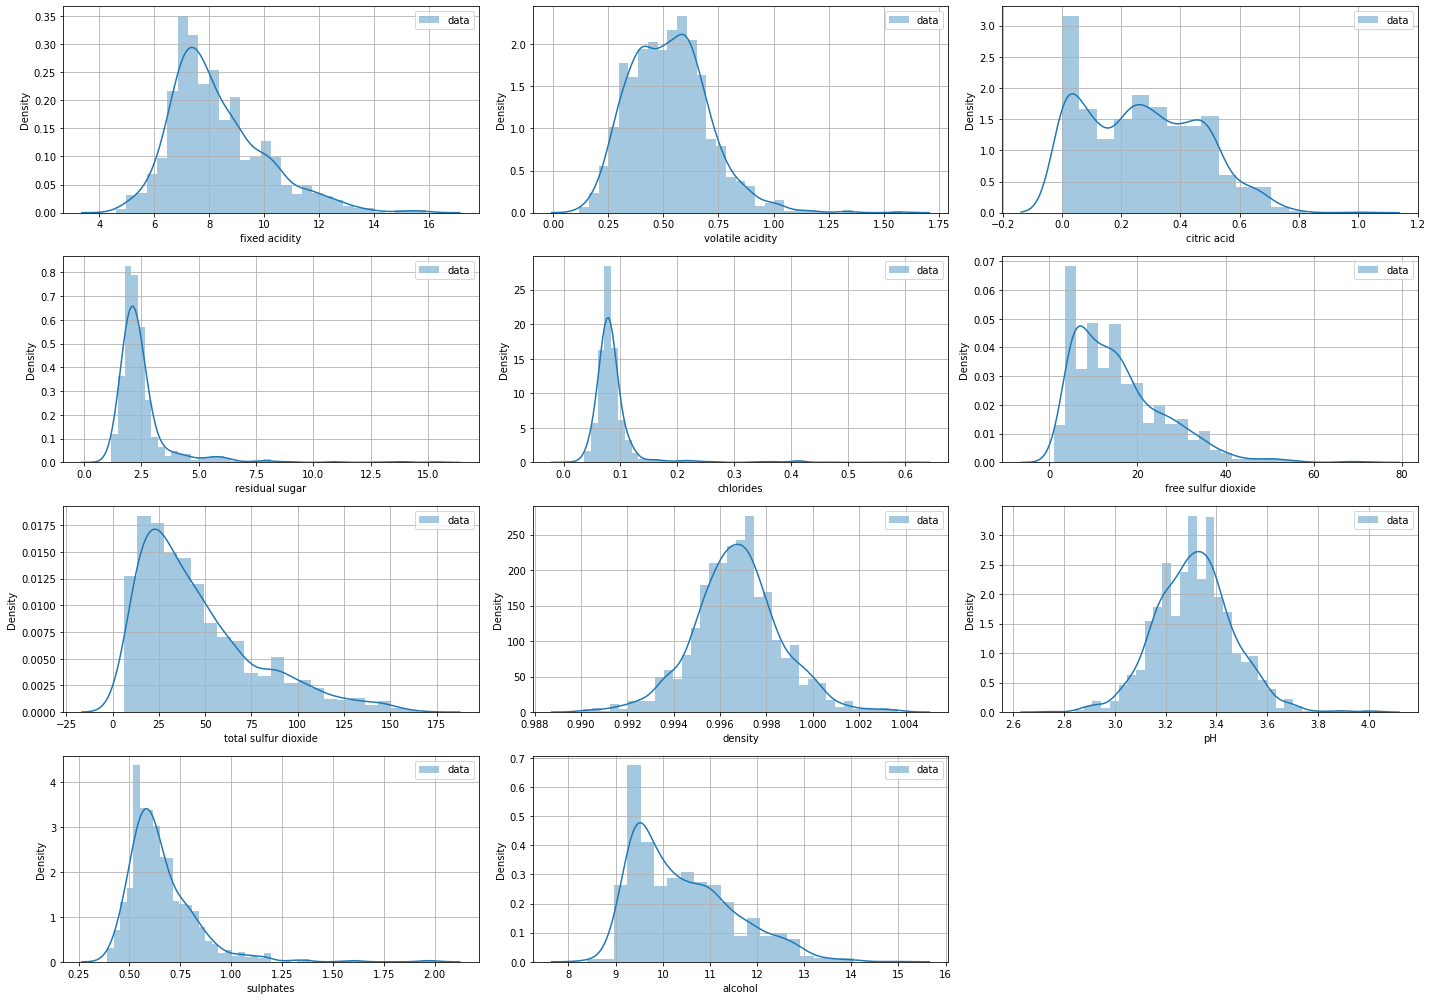

In [26]:
### 변수별 분포 시각화

plt.figure(figsize = (20,14))

for i, col in enumerate(list(red_train.iloc[:,:-1].columns.values)):
    plt.subplot(4,3,i+1) # 위치 지정
    sns.distplot(red_train[col], kde = True, label = 'data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- 대부분의 feature들이 분포에 편향이 있다고 판단된다.(오른쪽으로 긴 꼬리, **positively skewed** )
    - 데이터 변환 방법: 제곱근(square root), 세제곱근(cube root), **로그 변환(log transformation)**

In [27]:
### 각 변수들의 왜도(skewness) 확인

from scipy.stats import skew

features_idx = red_train.dtypes[red_train.dtypes != 'object'].index
skew_features = red_train[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.517559


In [28]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides               5.355371
residual sugar          4.566830
sulphates               2.556867
free sulfur dioxide     1.254573
total sulfur dioxide    1.185168
dtype: float64


### **c) 각 feature 변수와 target 변수 간의 관계**

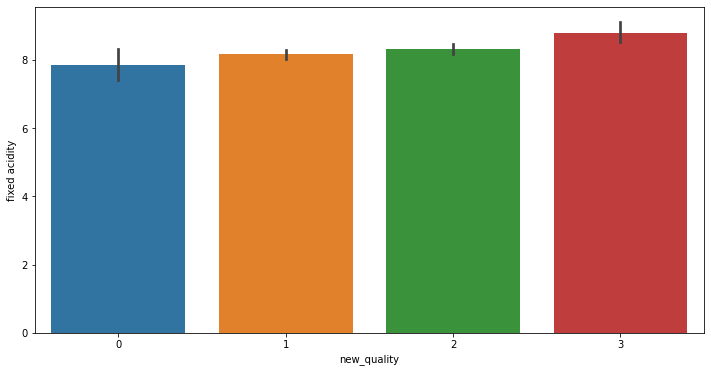

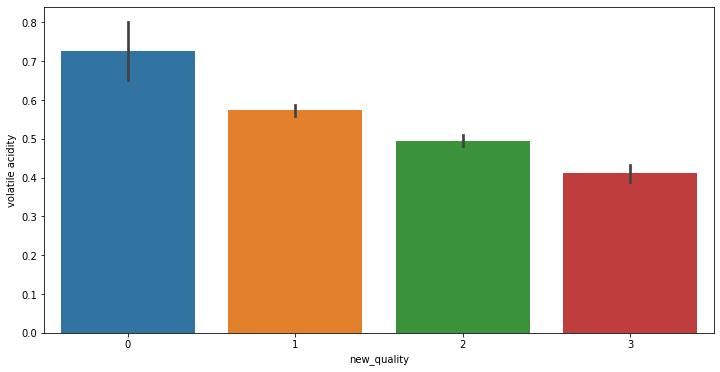

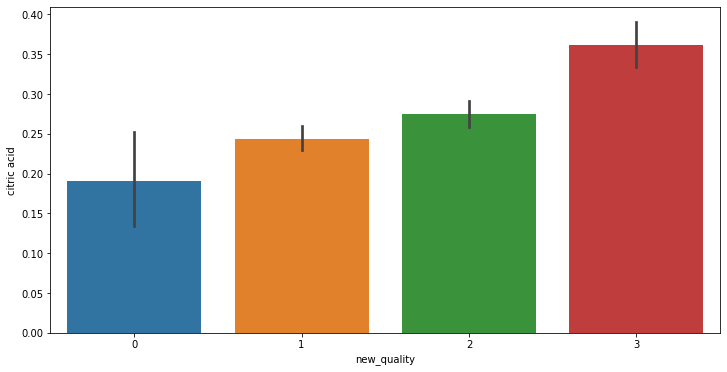

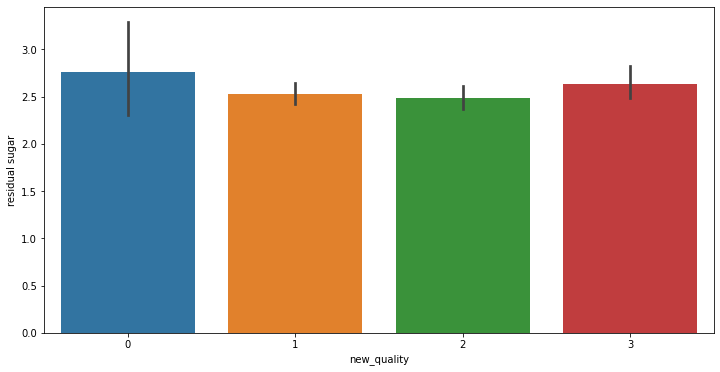

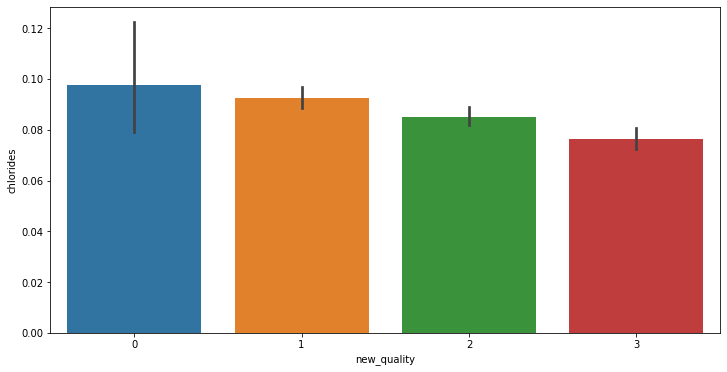

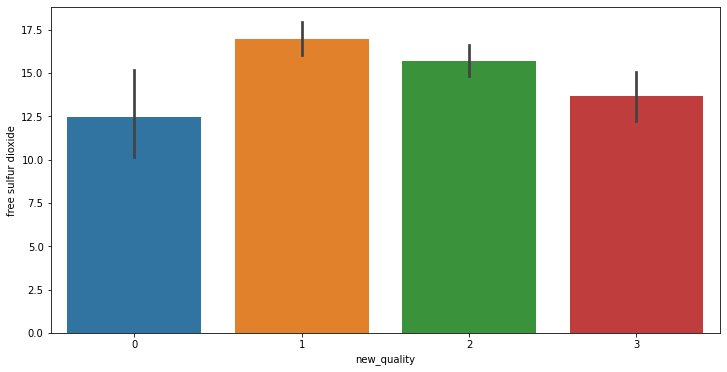

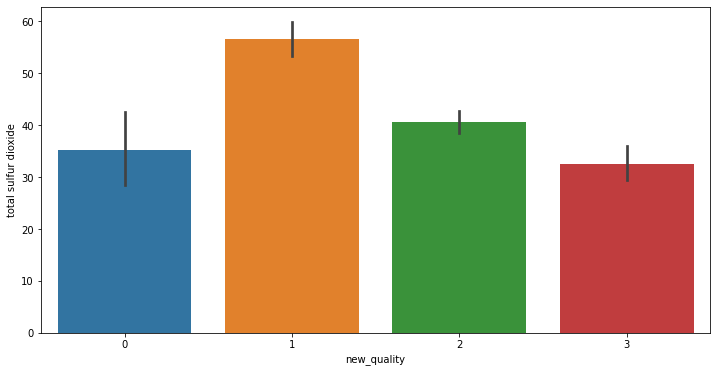

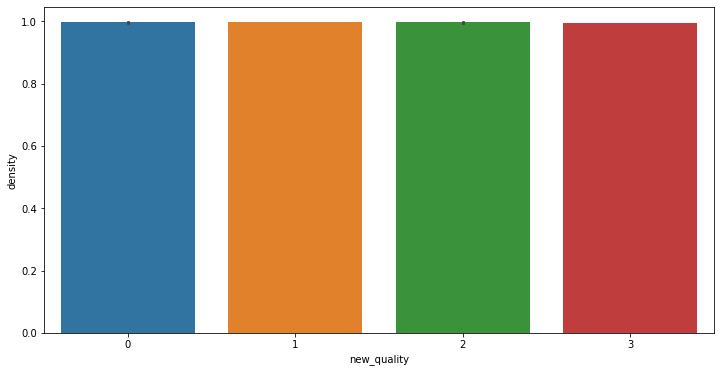

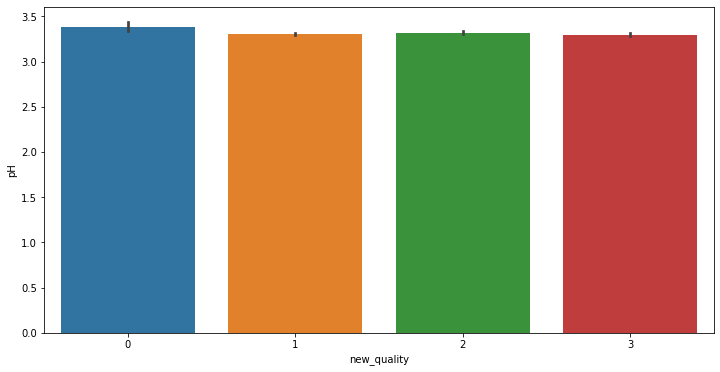

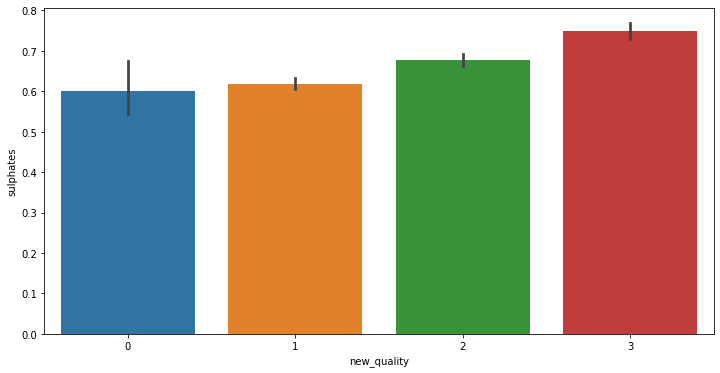

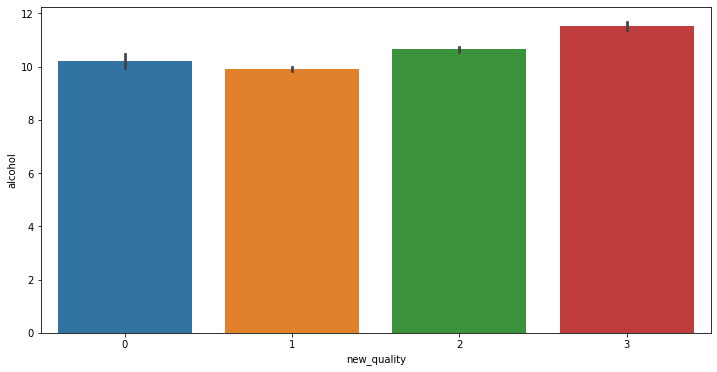

In [29]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'new_quality', 
                y = red_train.columns[i], 
                data = red_train)

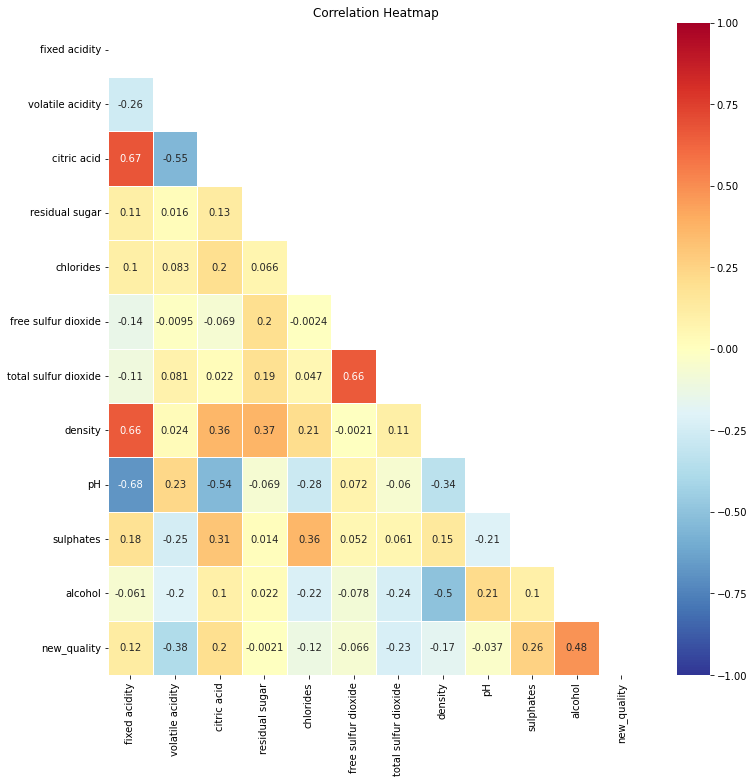

In [30]:
### train의 변수 간 상관관계

# 사이즈 지정
plt.figure(figsize = (12,12))

corr = red_train.corr()

# 삼각형 마스크 만들기(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths = .5,  # 경계면을 실선으로 구분하기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
    - 상관계수는 0.48로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
    - 해당 변수에 이상치가 있다면 제거하는 것을 추후에 고려해 볼 수 있다.
- '산도'와 관련된 변수들끼리 상관관계가 있다.
    - fixed acidity,volatile acidity, citric acid, pH
    - target 변수와의 상관도: volatile acidity > citric acid > fixed acidity > pH
- total sulfur dioxide와 free sulfur dioxide 간 상관관계가 있다.
    - 이름으로 보아 서로 관련있는 변수임을 짐작할 수 있다.
- density와 fixed acidity 간 강한 상관관계가 있다.
- alcohol과 density 간 상관관계가 있다.

# **3. 기본 Modeling**

## **3-1. 데이터 준비**

In [31]:
### feature / target 분리

red_X = red_train.drop(['new_quality'], axis = 1)
red_y = red_train['new_quality']

In [32]:
red_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
1,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
2,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
3,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3
4,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9


In [33]:
red_y.head()

0    1
1    2
2    1
3    1
4    1
Name: new_quality, dtype: int64

In [34]:
red_X.shape, red_y.shape

((1338, 11), (1338,))

In [35]:
### 표준화
# 데이터 간의 스케일 차이 조정

from sklearn.preprocessing import StandardScaler

colname = red_X.columns
scaler = StandardScaler() 
red_X = scaler.fit_transform(red_X)
red_X = pd.DataFrame(red_X, columns = colname)
red_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.284704,0.472976,-0.673610,-0.096298,-0.440110,-0.563086,-0.129865,0.086734,-0.804520,-0.394631,-0.876321
1,-0.178156,-1.944704,0.516861,-1.166156,-0.826478,1.949567,1.977642,-3.534675,-2.767887,-1.258249,2.128289
2,2.425434,-0.820202,1.707333,0.046350,-0.139602,1.466364,0.813795,1.518330,-1.393530,0.411413,0.062619
3,0.284704,-0.876427,1.086218,-0.310269,0.203836,2.239488,3.110034,0.404866,-1.786204,2.138650,-1.064109
4,-0.641017,0.191850,-0.052495,-0.381593,-0.096672,-0.273165,1.694544,-0.464696,-0.346402,-0.797653,-0.500745


In [36]:
red_test = scaler.transform(red_test)
red_test = pd.DataFrame(red_test, columns = colname)
red_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.888294,-0.539076,1.603814,-0.452917,-0.375715,-0.079884,-0.192776,1.942507,-1.655312,-0.970377,-1.345791
1,-1.277450,-0.707752,-0.570091,-0.524241,-0.397180,-0.466446,-0.664605,-0.655576,0.700727,0.468987,-0.312957
2,-0.293871,-0.482851,0.051025,0.117674,0.268231,0.210038,1.537267,-0.072333,-0.608184,0.065965,-0.970215
3,-0.293871,0.360526,-0.466572,-0.167622,-0.246926,0.113397,0.247599,0.404866,0.766173,-0.394631,-0.406851
4,-0.525302,-0.201725,-0.000735,-0.310269,-0.354251,-0.176524,-0.664605,-1.514534,0.242608,-0.164333,1.471030


- 제대로 표준화되었음을 확인할 수 있다.

In [37]:
### 교차 검증
# target 변수의 클래스가 불균형함
# target의 속성값의 개수를 동일하게 가져오기 위해 StratifiedKFold 활용

from sklearn.model_selection import StratifiedKFold

n_splits = 5 # 폴드 수 지정
skf = StratifiedKFold(n_splits = n_splits, 
                      random_state = 0, shuffle = True)

## **3-2. 기본 단일 모델** 

**📌 a) 선형 알고리즘(Linear Algorithm)**  
- LDA(Linear Discriminant Analysis)
- 경사하강법(SGDClassifier)

**📌 b) 비선형 알고리즘(Non-linear Algorithm)**
- 최소 근접 알고리즘(k-Nearest Neighbors)
- 결정 트리(Decision Tree)
- 가우시안 나이브 베이즈(Gaussian Naive Bayes)
- 서포트 벡터 머신(SVC)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [39]:
### 활용할 모델 정의

red_models = []

red_models.append(('LDA', LinearDiscriminantAnalysis()))
red_models.append(('SGD', SGDClassifier()))
red_models.append(('KNN', KNeighborsClassifier()))
red_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
red_models.append(('NB', GaussianNB()))
red_models.append(('SVC', SVC(random_state = 0)))

In [40]:
### 순차적으로 modeling + 학습/예측/검증

red_results = []
red_names = []
red_metrics = []

for name, model in red_models:
    cv_results = cross_val_score(model, red_X, red_y, 
                                 cv = skf, scoring = 'accuracy')
    red_results.append(cv_results)
    red_names.append(name)
    red_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red_metrics),3))

LDA: 0.594
SGD: 0.534
KNN: 0.585
DT: 0.589
NB: 0.555
SVC: 0.617

모든 모델의 평균 메트릭(정확도): 0.579


## **3-3. 기본 앙상블 모델 생성**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
red_ensemble = []

red_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
red_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
red_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
red_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
red_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
red_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
red_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [43]:
### 순차적으로 modeling + 학습/예측/검증

red_en_results = []
red_en_names = []
red_en_metrics = []

for name, model in red_ensemble:
    cv_results = cross_val_score(model, red_X, red_y, 
                                 cv = skf, scoring = 'accuracy', error_score="raise")
    red_en_results.append(cv_results)
    red_en_names.append(name)
    red_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red_en_metrics),3))

RF: 0.676
Bagging: 0.652
GB: 0.652
XGB: 0.651
LGBM: 0.663
Ada: 0.498
ET: 0.685

모든 모델의 평균 메트릭(정확도): 0.639


# **4. 데이터 변환**
- 왜곡이 심한 변수들에 대해 로그 변환 수행
    - 왜도(skewness)가 1 이상인 변수들만 변환

In [44]:
### 원본 데이터 유지를 위해 복사본 활용

red_train_2nd = red_train.copy()
red_train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
1,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,2
2,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,1
3,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,1
4,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,1


In [45]:
### 각 변수들의 왜도(skewness) 확인
# 왜도 측정은 표준화되지 않은 원본 데이터로 수행

from scipy.stats import skew

features_idx = red_train_2nd.dtypes[red_train_2nd.dtypes != 'object'].index
skew_features = red_train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.517559


In [46]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides               5.355371
residual sugar          4.566830
sulphates               2.556867
free sulfur dioxide     1.254573
total sulfur dioxide    1.185168
dtype: float64


In [47]:
### 로그 변환 적용
# 데이터를 변환하기 위해서는 데이터가 양수여야 함
# 따라서, 모든 데이터에 1을 더해준 후 로그 변환 수행

from scipy import stats

skewed = list(skew_features_top.index)

for ftr in skewed:
    red_train_2nd[ftr] = np.log1p(red_train_2nd[ftr])

red_train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,8.8,0.61,0.14,1.223775,0.064851,2.397895,3.761200,0.99690,3.19,0.463734,9.5,1
1,8.0,0.18,0.37,0.641854,0.047837,3.610918,4.700480,0.99007,2.89,0.364643,12.7,2
2,12.5,0.38,0.60,1.280934,0.077887,3.465736,4.290459,0.99960,3.10,0.548121,10.5,1
3,8.8,0.37,0.48,1.131402,0.092579,3.688879,4.983607,0.99750,3.04,0.708036,9.3,1
4,7.2,0.56,0.26,1.098612,0.079735,2.639057,4.615121,0.99586,3.26,0.418710,9.9,1


In [48]:
### 각 변수들의 왜도(skewness) 확인

features_idx = red_train_2nd.dtypes[red_train_2nd.dtypes != 'object'].index
skew_features = red_train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 0.995577


In [49]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides         4.831316
residual sugar    2.251827
sulphates         1.722156
dtype: float64


- 데이터 왜곡 정도가 완화됨

In [50]:
### feature / target 분리

red_X_2nd = red_train_2nd.drop(['new_quality'], axis = 1)
red_y_2nd = red_train_2nd['new_quality']

In [51]:
### 표준화 재수행

colname = red_X_2nd.columns
scaler = StandardScaler() 
red_X_2nd = scaler.fit_transform(red_X_2nd)
red_X_2nd = pd.DataFrame(red_X_2nd, columns = colname)
red_X_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.284704,0.472976,-0.673610,0.023367,-0.469651,-0.390091,0.190906,0.086734,-0.804520,-0.392274,-0.876321
1,-0.178156,-1.944704,0.516861,-2.142827,-0.907953,1.571270,1.576780,-3.534675,-2.767887,-1.431818,2.128289
2,2.425434,-0.820202,1.707333,0.236139,-0.133831,1.336522,0.971809,1.518330,-1.393530,0.493019,0.062619
3,0.284704,-0.876427,1.086218,-0.320491,0.244679,1.697328,1.994523,0.404866,-1.786204,2.170650,-1.064109
4,-0.641017,0.191850,-0.052495,-0.442551,-0.086212,-0.000151,1.450835,-0.464696,-0.346402,-0.864609,-0.500745


### **a) 단일 모델**

In [52]:
### 활용할 모델 정의

red2_models = []

red2_models.append(('LDA', LinearDiscriminantAnalysis()))
red2_models.append(('SGD', SGDClassifier()))
red2_models.append(('KNN', KNeighborsClassifier()))
red2_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
red2_models.append(('NB', GaussianNB()))
red2_models.append(('SVC', SVC(random_state = 0)))

In [53]:
### 순차적으로 modeling + 학습/예측/검증

red2_results = []
red2_names = []
red2_metrics = []

for name, model in red2_models:
    cv_results = cross_val_score(model, red_X_2nd, red_y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    red2_results.append(cv_results)
    red2_names.append(name)
    red2_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red2_metrics),3))

LDA: 0.601
SGD: 0.525
KNN: 0.585
DT: 0.589
NB: 0.563
SVC: 0.617

모든 모델의 평균 메트릭(정확도): 0.58


### **b) 앙상블 모델**

In [54]:
red2_ensemble = []

red2_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
red2_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
red2_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
red2_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
red2_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
red2_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
red2_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [55]:
### 순차적으로 modeling + 학습/예측/검증

red2_en_results = []
red2_en_names = []
red2_en_metrics = []

for name, model in red2_ensemble:
    cv_results = cross_val_score(model, red_X_2nd, red_y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    red2_en_results.append(cv_results)
    red2_en_names.append(name)
    red2_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red2_en_metrics),3))

RF: 0.674
Bagging: 0.653
GB: 0.651
XGB: 0.651
LGBM: 0.663
Ada: 0.497
ET: 0.675

모든 모델의 평균 메트릭(정확도): 0.638


- 단일 모델에서는 성능이 향상되고, 앙상블 모델에서는 성능이 하락됨
    - 현재 앙상블 모델의 성능이 대부분 더 좋다.
    - 성능이 떨어지기에 로그 변환을 하지 않는 쪽으로 결정

# **5. 변수들 간의 상관도**

## **5-1. target 변수와의 상관도**

- target 변수와 가장 상관도가 높은 변수는 alcohol이다.
- 해당 변수의 이상치를 제거해보자.

In [56]:
### 데이터 원본을 유지하기 위해 복사본 활용

red_X_3rd = red_X.copy()
red_y_3rd = red_y.copy()

In [57]:
red_train_3 = pd.concat([red_X_3rd, red_y_3rd], axis = 1)

In [58]:
### 이상치 제거 함수

def get_outlier(df = None, column = None, weight = 1.5):
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함 
    df = df[column]
    quantile_25 = np.percentile(df.values, 25)
    quantile_75 = np.percentile(df.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = df[(df < lowest_val) | (df > highest_val)].index
    
    return outlier_index

In [59]:
### alcohol에서 이상치 찾기

outlier_index = get_outlier(df = red_train_3, column = 'alcohol', weight = 1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([215, 220, 272, 482, 533, 574, 694, 958, 1009], dtype='int64')


In [60]:
### 이상치 데이터 삭제

red_train_3.drop(outlier_index, axis = 0, inplace = True)

In [61]:
### feature/target 분리

red_X_3rd = red_train_3.drop(['new_quality'], axis = 1)
red_y_3rd = red_train_3['new_quality']

### **a) 단일 모델**

In [62]:
### 활용할 모델 정의

red3_models = []

red3_models.append(('LDA', LinearDiscriminantAnalysis()))
red3_models.append(('SGD', SGDClassifier()))
red3_models.append(('KNN', KNeighborsClassifier()))
red3_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
red3_models.append(('NB', GaussianNB()))
red3_models.append(('SVC', SVC(random_state = 0)))

In [63]:
### 순차적으로 modeling + 학습/예측/검증

red3_results = []
red3_names = []
red3_metrics = []

for name, model in red3_models:
    cv_results = cross_val_score(model, red_X_3rd, red_y_3rd, 
                                 cv = skf, scoring = 'accuracy')
    red3_results.append(cv_results)
    red3_names.append(name)
    red3_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red3_metrics),3))

LDA: 0.594
SGD: 0.518
KNN: 0.570
DT: 0.591
NB: 0.552
SVC: 0.627

모든 모델의 평균 메트릭(정확도): 0.575


### **b) 앙상블 모델**

In [64]:
red3_ensemble = []

red3_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
red3_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
red3_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
red3_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
red3_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
red3_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
red3_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [65]:
### 순차적으로 modeling + 학습/예측/검증

red3_en_results = []
red3_en_names = []
red3_en_metrics = []

for name, model in red3_ensemble:
    cv_results = cross_val_score(model, red_X_3rd, red_y_3rd, 
                                 cv = skf, scoring = 'accuracy')
    red3_en_results.append(cv_results)
    red3_en_names.append(name)
    red3_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red3_en_metrics),3))

RF: 0.669
Bagging: 0.655
GB: 0.658
XGB: 0.660
LGBM: 0.653
Ada: 0.488
ET: 0.681

모든 모델의 평균 메트릭(정확도): 0.638


- 성능이 조금 개선됨

## **5-2. feature 변수들 간의 상관도**

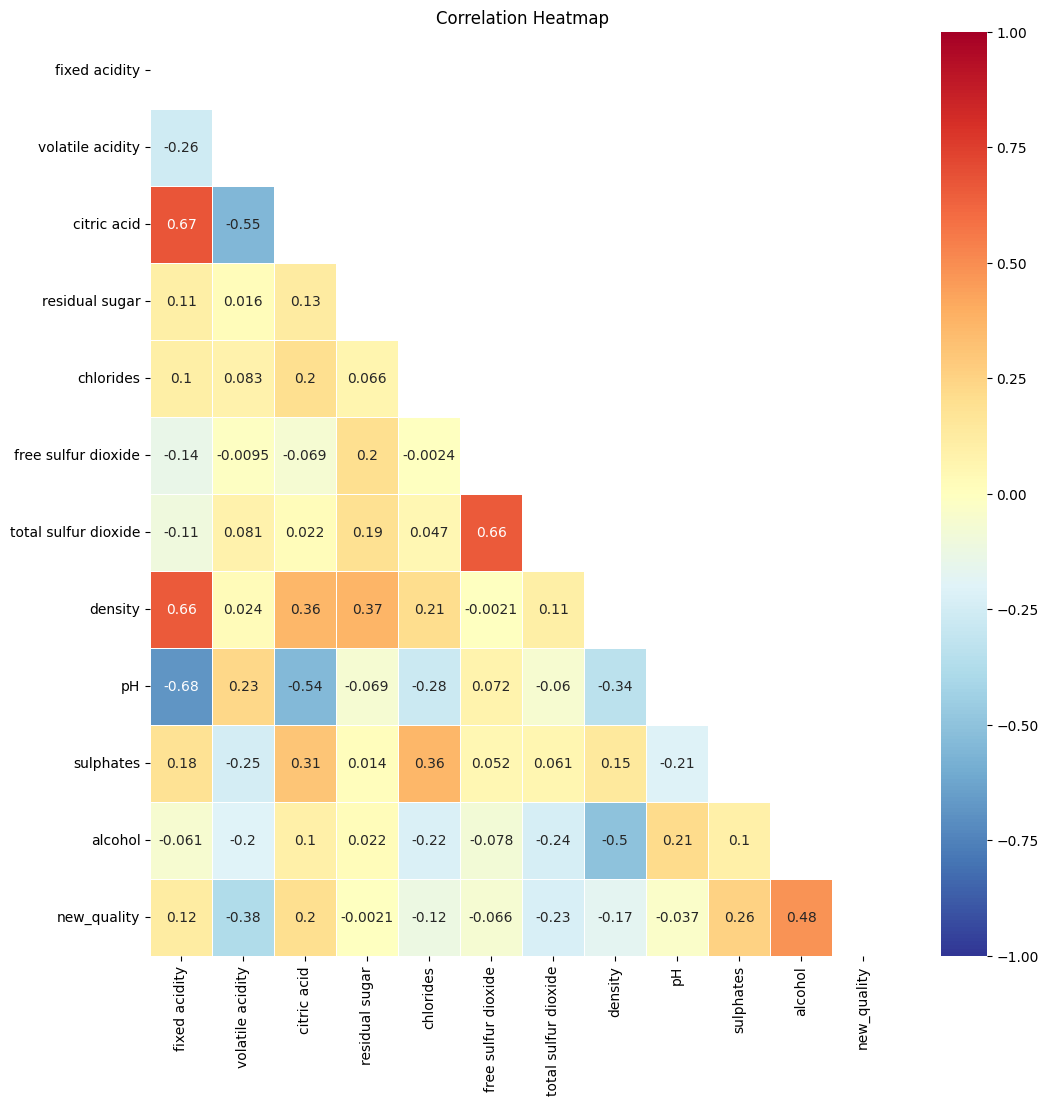

- target 변수(quality)와 상관도가 가장 높은 변수는 ```alcohol```이다.
    - 상관계수는 **0.48**로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
- '산도'와 관련된 변수들끼리 상관관계가 있다.
    - ```fixed acidity```, ```volatile acidity```, ```citric acid```, ```pH```
    - target 변수와의 상관도: volatile acidity > citric acid > fixed acidity > pH
    - ```pH```는 ```fixed acidity```로 관계를 어느 정도 유추할 수 있기에 **삭제**하기로 결정
    - ```density```는 산도와 당도 등 여러 가지를 종합하여 사람이 맛으로 느끼는 바디감 등을 수치화 한 것으로, 다른 변수들을 통해 관련된 정보들을 도출할 수 있다. -> **삭제** 결정
- total sulfur dioxide와 free sulfur dioxide 간 상관관계가 있다.
    - 이름으로 보아 서로 관련있는 변수임을 짐작할 수 있다.
    - target 변수와 상관도가 조금 더 높은 ```free sulfur dioxide```만 남김
- density와 fixed acidity 간 강한 상관관계가 있다.
- alcohol과 density 간 상관관계가 있다.

> 최종 삭제 변수: pH, density, free sulfur dioxide

- 변수 판단 기준: 아래 링크 활용
    - [와인상식](http://the-scent.co.kr/bbs/board.php?bo_table=wine_how_to&wr_id=29&page=7)

⭐ **이후 최종 예측 시 test에서도 해당 변수들을 제거해 주는 거 잊지 말기!**

In [66]:
### 데이터 원본을 유지하기 위해 복사본 활용

red_X_4th = red_X_3rd.copy()
red_y_4th = red_y_3rd.copy()

In [67]:
red_train_4 = pd.concat([red_X_4th, red_y_4th], axis = 1)

In [68]:
red_train_4 = red_train_4.drop(['pH', 'density', 'free sulfur dioxide'], axis = 1)
red_train_4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,new_quality
0,0.284704,0.472976,-0.673610,-0.096298,-0.440110,-0.129865,-0.394631,-0.876321,1
1,-0.178156,-1.944704,0.516861,-1.166156,-0.826478,1.977642,-1.258249,2.128289,2
2,2.425434,-0.820202,1.707333,0.046350,-0.139602,0.813795,0.411413,0.062619,1
3,0.284704,-0.876427,1.086218,-0.310269,0.203836,3.110034,2.138650,-1.064109,1
4,-0.641017,0.191850,-0.052495,-0.381593,-0.096672,1.694544,-0.797653,-0.500745,1


In [69]:
### feature/target 분리

X_4th = red_train_4.drop(['new_quality'], axis = 1)
y_4th = red_train_4['new_quality']

### **a) 단일 모델**

In [70]:
### 활용할 모델 정의

red4_models = []

red4_models.append(('LDA', LinearDiscriminantAnalysis()))
red4_models.append(('SGD', SGDClassifier()))
red4_models.append(('KNN', KNeighborsClassifier()))
red4_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
red4_models.append(('NB', GaussianNB()))
red4_models.append(('SVC', SVC(random_state = 0)))

In [71]:
### 순차적으로 modeling + 학습/예측/검증

red4_results = []
red4_names = []
red4_metrics = []

for name, model in red4_models:
    cv_results = cross_val_score(model, red_X_4th, red_y_4th, 
                                 cv = skf, scoring = 'accuracy')
    red4_results.append(cv_results)
    red4_names.append(name)
    red4_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red4_metrics),3))

LDA: 0.594
SGD: 0.527
KNN: 0.570
DT: 0.591
NB: 0.552
SVC: 0.627

모든 모델의 평균 메트릭(정확도): 0.577


### **b) 앙상블 모델**

In [72]:
red4_ensemble = []

red4_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
red4_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
red4_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
red4_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
red4_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
red4_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
red4_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [73]:
### 순차적으로 modeling + 학습/예측/검증

red4_en_results = []
red4_en_names = []
red4_en_metrics = []

for name, model in red4_ensemble:
    cv_results = cross_val_score(model, red_X_4th, red_y_4th, 
                                 cv = skf, scoring = 'accuracy')
    red4_en_results.append(cv_results)
    red4_en_names.append(name)
    red4_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red4_en_metrics),3))

RF: 0.669
Bagging: 0.655
GB: 0.658
XGB: 0.660
LGBM: 0.653
Ada: 0.488
ET: 0.681

모든 모델의 평균 메트릭(정확도): 0.638


- 성능에 별다른 개선은 x

**⭐ 데이터는 이상치가 제거된 ```red_X_3rd```와 ```red_y_3rd```를 계속해서 활용**

# **6. 데이터 불균형 처리**

## **6-1. 클래스 가중치 부여(Weight Balancing)**

- 관련 코드 같은 걸 찾기는 했는데,, 잘못 적용한 건지 성능이 너무 떨어져서 지웠습니다...ㅎ  
(원래는 가중치 주면 비슷하거나 성능이 올라가면 올라가지 내려가는 경우는 거의 없음,,)
- 혹시 활용할 사람 있을까봐 링크 남겨둘게용
    - [Reference](https://medium.com/grabngoinfo/balanced-weights-for-imbalanced-classification-465f0e13c5ad)

## **6-2. SMOTE**
- 클래스를 모아도 클래스 간의 불균형이 해결되지는 x
    - 오버샘플링 적용

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
red_X_over, red_y_over = smote.fit_resample(red_X_3rd, red_y_3rd)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', red_X_3rd.shape, red_y_3rd.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', red_X_over.shape, red_y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(red_y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1329, 11) (1329,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2280, 11) (2280,)
SMOTE 적용 후 레이블 값 분포: 
 1    570
2    570
0    570
3    570
Name: new_quality, dtype: int64


- SMOTE 적용 후 클래스 4의 경우 11배 이상 데이터가 증가함
- 클래스 7의 경우 4배 정도 증가

### **a) 단일 모델**

In [75]:
### 활용할 모델 정의

red5_models = []

red5_models.append(('LDA', LinearDiscriminantAnalysis()))
red5_models.append(('SGD', SGDClassifier()))
red5_models.append(('KNN', KNeighborsClassifier()))
red5_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
red5_models.append(('NB', GaussianNB()))
red5_models.append(('SVC', SVC(random_state = 0)))

In [76]:
### 순차적으로 modeling + 학습/예측/검증

red5_results = []
red5_names = []
red5_metrics = []

for name, model in red5_models:
    cv_results = cross_val_score(model, red_X_over, red_y_over, 
                                 cv = skf, scoring = 'accuracy')
    red5_results.append(cv_results)
    red5_names.append(name)
    red5_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red5_metrics),3))

LDA: 0.586
SGD: 0.531
KNN: 0.718
DT: 0.739
NB: 0.528
SVC: 0.671

모든 모델의 평균 메트릭(정확도): 0.629


### **b) 앙상블 모델**

In [77]:
red5_ensemble = []

red5_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
red5_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
red5_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
red5_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
red5_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
red5_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
red5_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [78]:
### 순차적으로 modeling + 학습/예측/검증

red5_en_results = []
red5_en_names = []
red5_en_metrics = []

for name, model in red5_ensemble:
    cv_results = cross_val_score(model, red_X_over, red_y_over, 
                                 cv = skf, scoring = 'accuracy')
    red5_en_results.append(cv_results)
    red5_en_names.append(name)
    red5_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(red5_en_metrics),3))

RF: 0.813
Bagging: 0.771
GB: 0.750
XGB: 0.810
LGBM: 0.814
Ada: 0.509
ET: 0.829

모든 모델의 평균 메트릭(정확도): 0.756


- 성능이 크게 **향상됨**

# **7. 하이퍼 파라미터 튜닝**

- 성능이 좋은 모델은 **ExtraTrees**, **LGBM**, **XGB**임
    - 모두 **Oversampling** 된 데이터로 학습
- 해당 모델들에 대해 **하이퍼 파라미터 튜닝**을 적용해 보자.
- [extraTrees 설명](https://velog.io/@nata0919/Extra-Trees-%EC%A0%95%EB%A6%AC)

### **7-1. ExtraTrees**

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
params = {
    'n_estimators' : [200, 300, 400, 500, 600]
}

### 모델 객체
et = ExtraTreesClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = et, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(red_X_over, red_y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.832018 using {'n_estimators': 400}


In [89]:
### 최적 모델 생성

et_opt = ExtraTreesClassifier(n_estimators = 400, random_state = 0)

### **7-2. LightGBM**
- [lgbm 파라미터 튜닝](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [80]:
params = {
    'boosting_type' : ['gbdt', 'dart', 'rf'], 
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators' : [100, 200, 300, 400, 500],
    'num_leaves' : [10, 20, 30, 40, 50]
}

### 모델 객체
lgbm = LGBMClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = lgbm, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(red_X_over, red_y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.832895 using {'boosting_type': 'dart', 'learning_rate': 0.2, 'n_estimators': 500, 'num_leaves': 40}


In [93]:
lgbm_opt = LGBMClassifier(boosting_type = 'dart',learning_rate = 0.2,
                          n_estimators = 500,num_leaves = 40, random_state = 0)

### **7-3. XGB**

In [84]:
params = {
    'tree_method' : ['exact', 'gpu_hist'],
    'learning_rate' : [0.01, 0.1, 0.3],
    'max_depth' : [4,6,8],
    'max_leaves' : [200, 300, 400],
}

### 모델 객체
xgb = XGBClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = xgb, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(red_X_over, red_y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.811404 using {'learning_rate': 0.3, 'max_depth': 4, 'max_leaves': 200, 'tree_method': 'gpu_hist'}


In [97]:
xgb_opt = XGBClassifier(learning_rate = 0.3, max_depth = 4, max_leaves = 200, 
                        tree_method = 'gpu_hist',random_state = 0)

# **8. 스태킹 모델 생성**
- 개별 모델: hyper parameter tuning을 적용한 ```ET```, ```LGBM```, ```XGB```
- 최종 예측 모델: ```RandomForest```

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

### 개별 기반 모델에서 최종 메타 모델이 사용할 학습/테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    skf = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 0)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__ , ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(skf.split(X_train_n, y_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)       
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)    
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터
    # test_pred_mean은 테스트 데이터
    
    return train_fold_pred, test_pred_mean

**✔ 에러 해결**  
```.iloc[]```는 기본적으로 (축의 0부터 길이-1까지의) 정수 위치 기반이지만 bool 배열과 함께 사용할 수도 있음

In [99]:
### 학습용, 검증용 데이터 분한

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(red_X_over,red_y_over, 
                                                    test_size = 0.2, random_state = 0)

In [100]:
### 1. 각 개별 기반 모델 학습
# 각 모델별로 메타 모델이 추후에 사용할 학습용/테스트용 데이터 세트를 생성

et_train, et_valid = get_stacking_base_datasets(et_opt, X_train, y_train, X_valid, 5)
lgbm_train, lgbm_valid = get_stacking_base_datasets(lgbm_opt, X_train, y_train, X_valid, 5)
xgb_train, xgb_valid = get_stacking_base_datasets(xgb_opt, X_train, y_train, X_valid,5)    

ExtraTreesClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [101]:
### 2. 최종 예측

Stack_final_X_train = np.concatenate((et_train, lgbm_train, xgb_train), axis = 1)
Stack_final_X_valid = np.concatenate((et_valid, lgbm_valid, xgb_valid), axis = 1)

rf_final = RandomForestClassifier(random_state = 0)
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_valid)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_valid, stack_final)))

최종 메타 모델의 예측 정확도: 0.8268


- 개별 lgbm 단일 모델의 성능이 더 좋다.

# **9. 제출 파일 생성**
- class: [4,5,6,7]을 [0,1,2,3]으로 변경한 상태
    - XGB 에러(클래스가 0부터 시작하길 바람)
    - 최종 예측은 각 예측값 + 4 해야 함

In [102]:
submission = pd.read_csv('./data/sample_submission.csv')

In [103]:
from sklearn.ensemble import ExtraTreesClassifier

fin_model = LGBMClassifier(boosting_type = 'dart',learning_rate = 0.2,
                           n_estimators = 500,num_leaves = 40, random_state = 0)
fin_model.fit(red_X_over, red_y_over)

LGBMClassifier(boosting_type='dart', learning_rate=0.2, n_estimators=500,
               num_leaves=40, random_state=0)

In [104]:
y_red_pred = fin_model.predict(red_test)

In [105]:
submission.iloc[red_idx,-1] =  y_red_pred + 4
submission

,index,quality
0,0,0
1,1,6
2,2,0
3,3,0
4,4,0
...,...,...
995,995,6
996,996,0
997,997,5
998,998,6


In [106]:
# csv 파일로 저장

submission.to_csv('./data/red_submission.csv', index = False)